In [ ]:
import numpy as np
import pandas as pd 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
import plotly.express as px
print(os.listdir("../input/dogs-vs-cats/"))


In [ ]:
FAST_RUN = True
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [ ]:
train_path = "../input/dogs-vs-cats/test1.zip"
test_path = "../input/dogs-vs-cats/train.zip"

files = "../working/"

import zipfile

with zipfile.ZipFile(train_path, 'r') as zipp:
    zipp.extractall(files)
    
with zipfile.ZipFile(test_path, 'r') as zipp:
    zipp.extractall(files)

In [ ]:
filenames = os.listdir('../working/train')
categories = []

# for filename in filenames: 
#     category = filename.split('.')[0]
#     if category =='dog':
#         categories.append(1)
#     else: 
#         categories.append(0)
categories = [int(filename.split('.')[0] == 'dog') for filename in filenames]

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 
print(df.head(20))

In [ ]:
df['category'].value_counts().plot(kind='bar')

In [ ]:
import plotly.express as px
import pandas as pd

counts = dataset['category'].value_counts()
fig=px.pie(counts.head(10),values= 'category', names=dataset['category'].unique(),hole=0.425)
fig.update_layout(title='Data Distribution of Data',font_size=15,title_x=0.45,annotations=[dict(text='Cat vs Dog',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

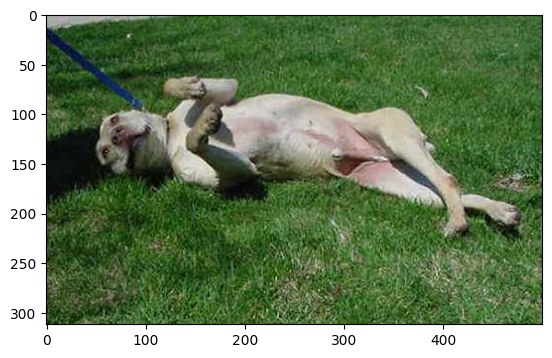

In [6]:
sample = random.choice(filenames)
img = load_img('/kaggle/working/train/' + sample)
plt.imshow(img)

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization, Input

model = Sequential()

model.add(Input(shape = (IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,942,786 (49.37 MB)

 Trainable params: 12,941,314 (49.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [8]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [9]:
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


 train values 
 category
dog    10000
cat    10000
Name: count, dtype: int64 
 validation values 
 category
dog    2500
cat    2500
Name: count, dtype: int64


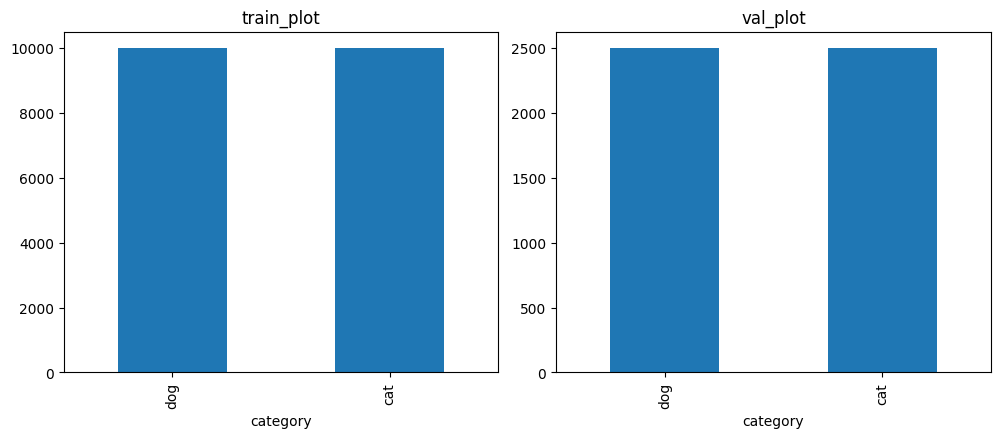

In [10]:
df_train, df_val = train_test_split(df, test_size=0.20, random_state=42, stratify = df['category'])
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

_,axs = plt.subplots(1, 2, figsize=(10, 4))
plt.tight_layout()

df_train['category'].value_counts().plot(kind='bar', ax=axs[0])
axs[0].set_title('train_plot')

df_val['category'].value_counts().plot(kind='bar', ax=axs[1])
axs[1].set_title('val_plot')

print(
    f"\n train values \n {df_train['category'].value_counts()}",
    f"\n validation values \n {df_val['category'].value_counts()}",
)

In [11]:
total_train = df_train.shape[0]
total_val = df_val.shape[0]
batch_size=15

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_dataframe(
    dataframe = df_train,
    directory = '../working/train',
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_dataframe(
    df_val, 
    "../working/train", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)


Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [13]:
epochs = 5 if FAST_RUN else 50
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=total_val//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1333/1333 ━━━━━━━━━━━━━━━━━━━━ 514s 383ms/step - accuracy: 0.6137 - loss: 0.9240 - val_accuracy: 0.6112 - val_loss: 0.7544 - learning_rate: 0.0010
Epoch 2/5


/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


1333/1333 ━━━━━━━━━━━━━━━━━━━━ 0s 49us/step - accuracy: 0.6000 - loss: 0.8120 - val_accuracy: 1.0000 - val_loss: 0.2639 - learning_rate: 0.0010
Epoch 3/5


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


 217/1333 ━━━━━━━━━━━━━━━━━━━━ 6:40 359ms/step - accuracy: 0.7576 - loss: 0.5144

KeyboardInterrupt: 

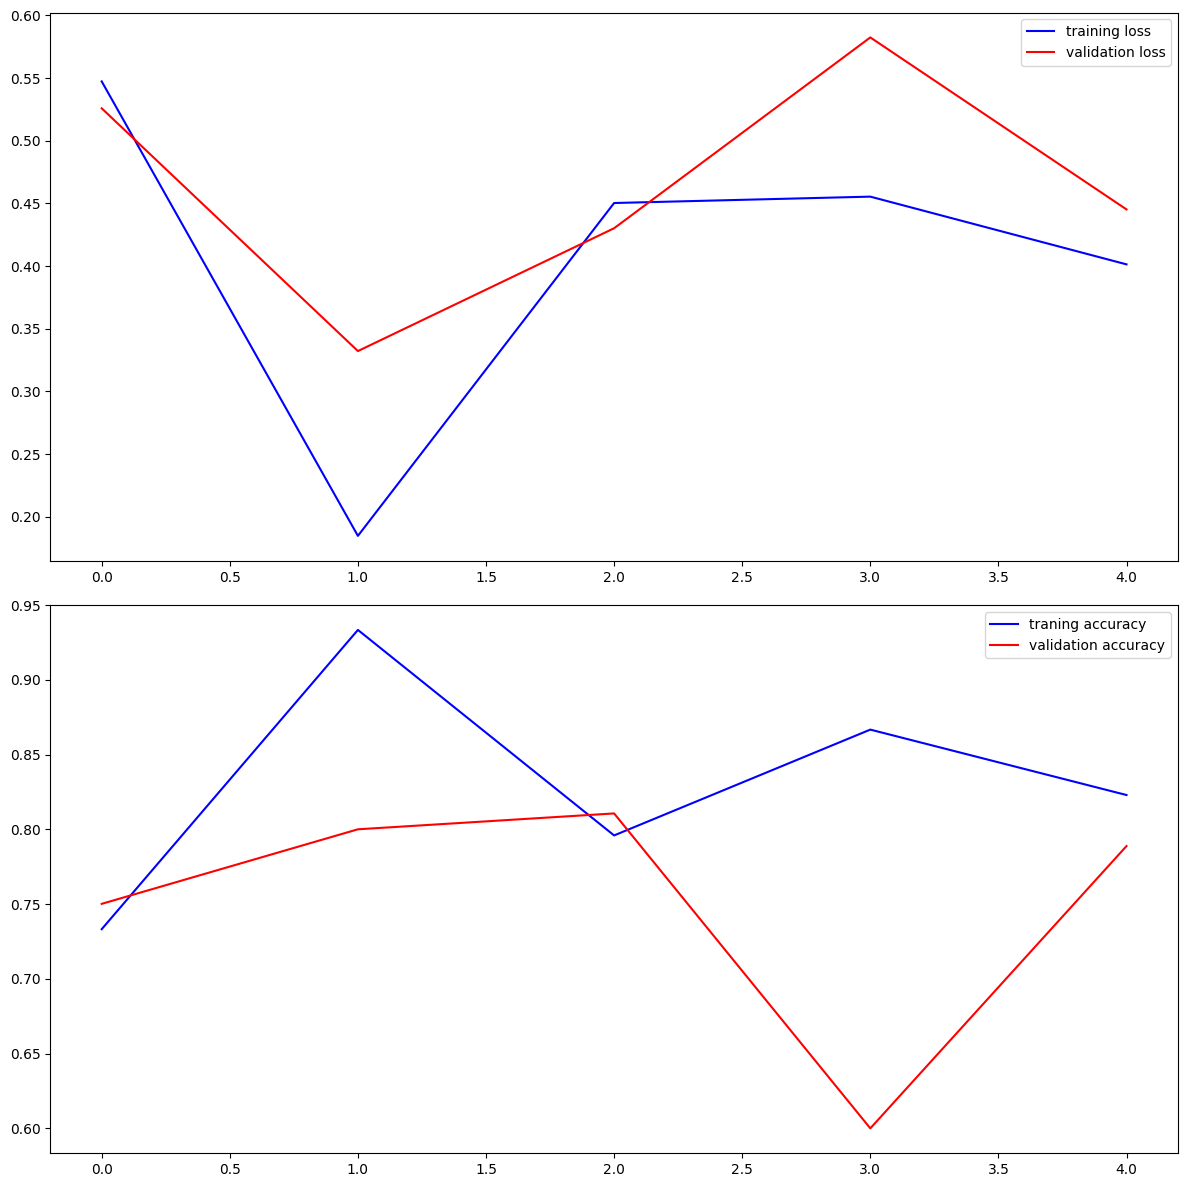

In [60]:
_, axs = plt.subplots(2, 1, figsize=(12, 12))
plt.tight_layout()

axs[0].plot(history.history['loss'], color = 'b', label = 'training loss')
axs[0].plot(history.history['val_loss'], color = 'r', label = 'validation loss')
axs[0].legend()

axs[1].plot(history.history['accuracy'], color='b', label = 'traning accuracy')
axs[1].plot(history.history['val_accuracy'], color='r', label = 'validation accuracy')
axs[1].legend()

In [35]:
filenames = os.listdir('../working/test1')

df_test = pd.DataFrame({
    'filename': filenames,
})

nb_samples = df_test.shape[0]
print(df_test.head(20))

     filename
0    5570.jpg
1   10397.jpg
2    3421.jpg
3   11159.jpg
4    5589.jpg
5   10623.jpg
6   10903.jpg
7   11792.jpg
8     233.jpg
9    8015.jpg
10   7783.jpg
11   5968.jpg
12   6322.jpg
13   5394.jpg
14    301.jpg
15   2168.jpg
16   7612.jpg
17   7990.jpg
18   2835.jpg
19   5434.jpg


In [33]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_daAgen.flow_from_dataframe(
    df_test, 
    "../working/test1", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 12500 validated image filenames.


In [ ]:
predict = model.predict(test_generator, steps=int(np.ceil(nb_samples/batch_size)))

In [50]:
df_test['category'] = np.argmax(predict, axis=-1)
print(df_test.head(10))

    filename  category
0   5570.jpg         1
1  10397.jpg         0
2   3421.jpg         1
3  11159.jpg         1
4   5589.jpg         0
5  10623.jpg         1
6  10903.jpg         1
7  11792.jpg         1
8    233.jpg         0
9   8015.jpg         1


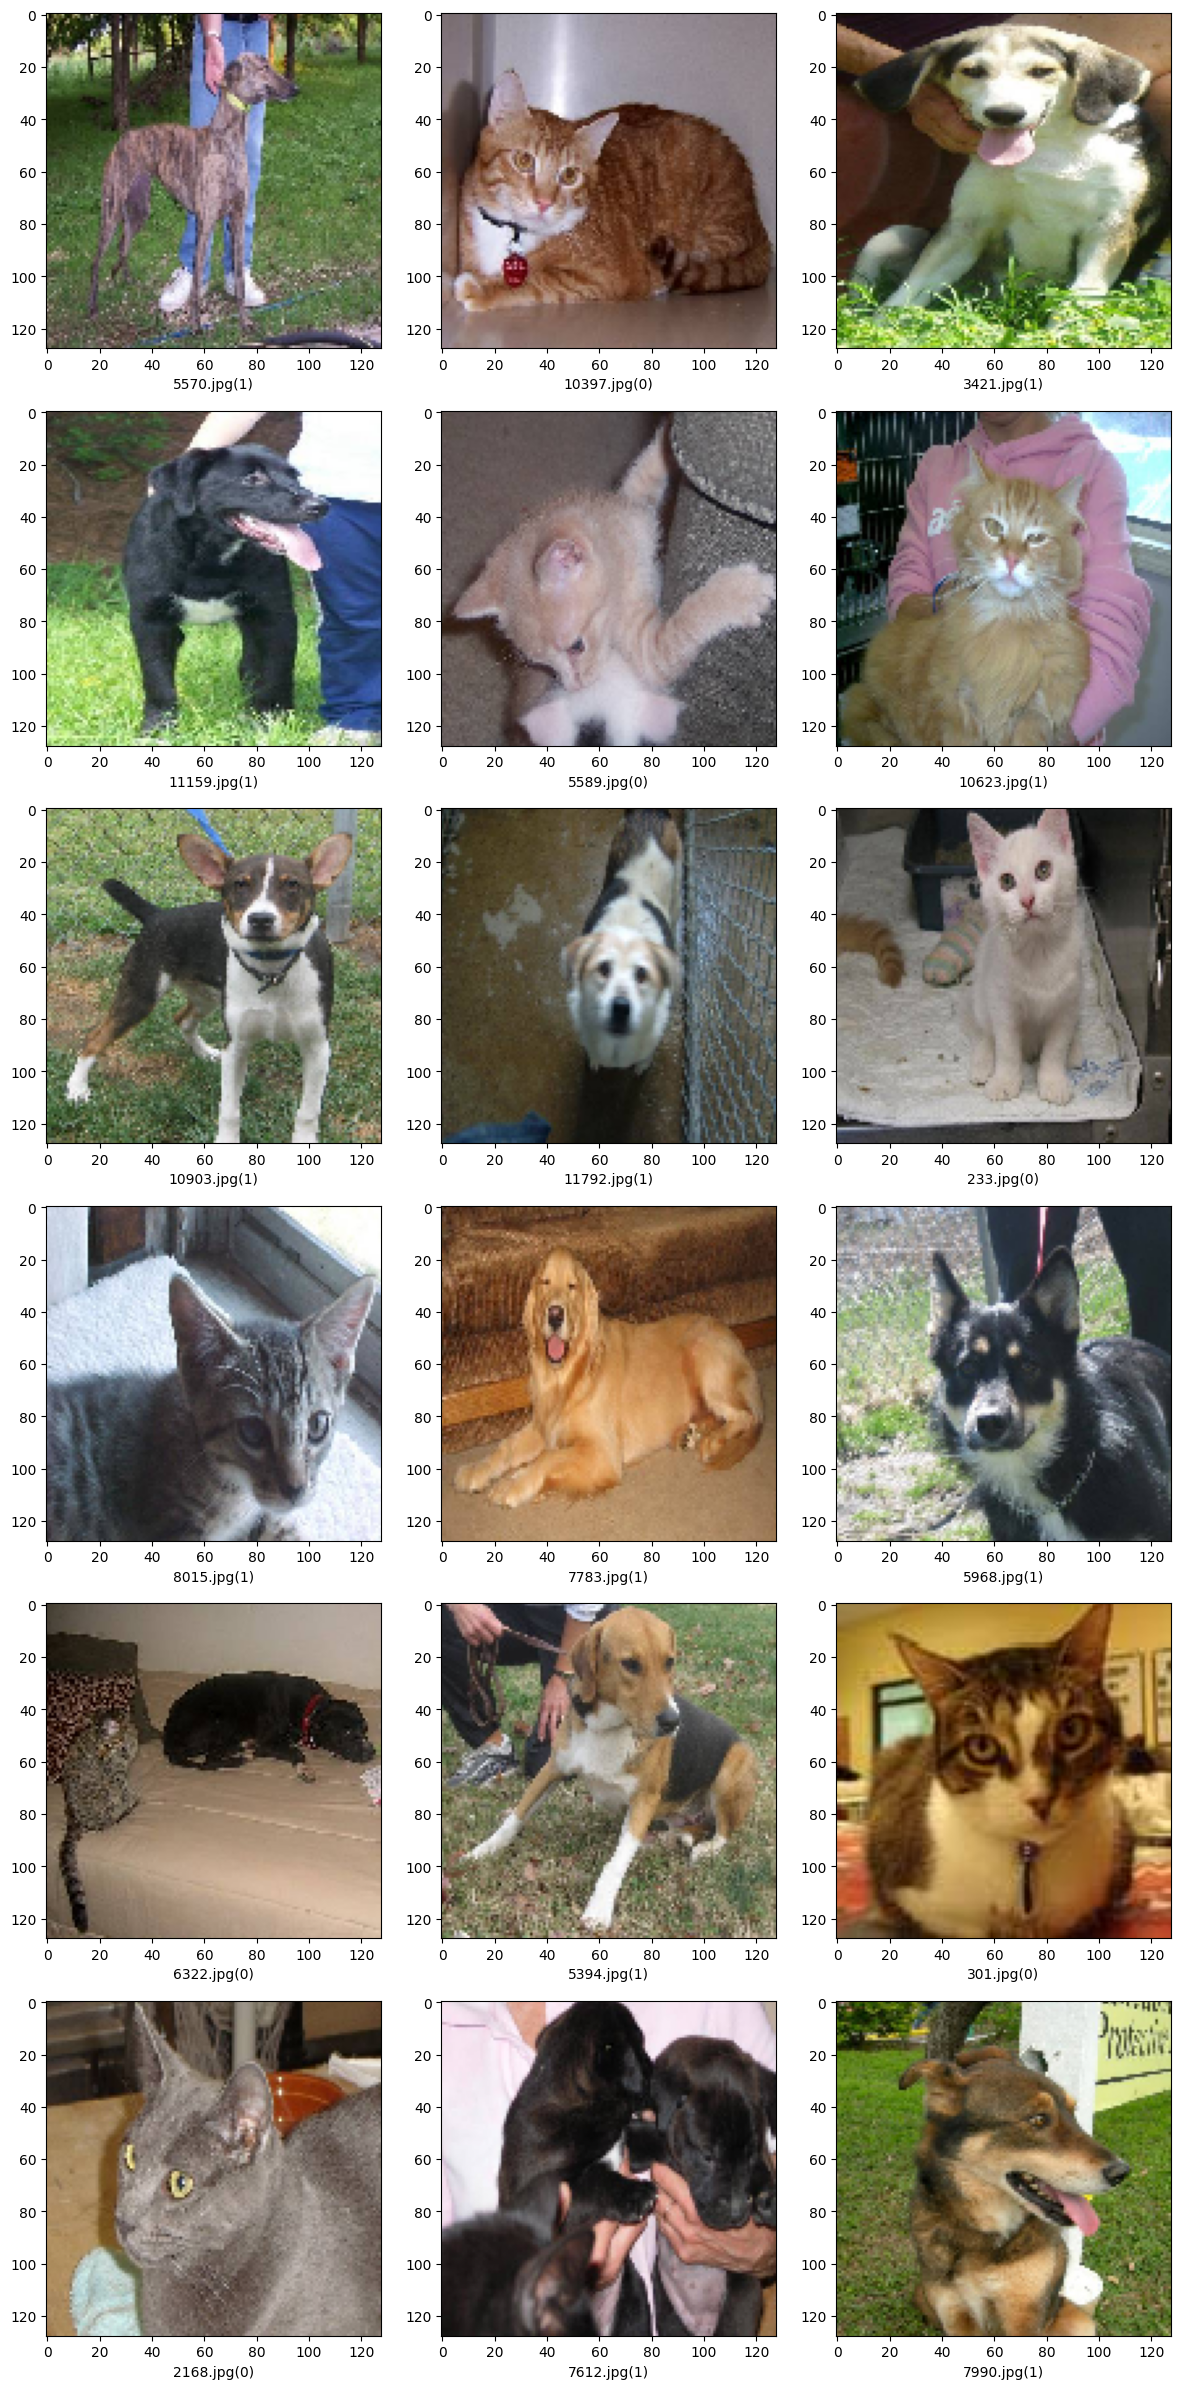

In [57]:
sample_test = df_test.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("../working/test1/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [64]:
submission_df = df_test.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)